# Table of Contents

## 1. Number of Customers Per Loyalty Status
## 2. Differences in Ordering Habits Based on Customer Region
## 3. Ordering Habits Based on Age and Family Status
## 4. Grouping Products by Price Range
## 5. Top Demographies by Number of Orders and Revenue
## 6. Revenue Fluctuations Per Hour


# Importing Libraries and Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

# import df

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df = pd.read_pickle(os.path.join(path, 'cust_ords_prods_prior_3.pkl'))

In [2]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,mean_price_updated,spending_class_updated,region,low_activity_customer_?,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2019-02-17,3,married,40423,6.367797,Low spender,South,0.0,beverages


# 1. Number of Customers Per Loyalty Status

In [3]:
# count of unique customers

loyalty_frequent_customer = df.groupby(['loyalty_flag', 'frequent_customer']).agg({'user_id' : 'nunique'})

loyalty_frequent_customer

user_id
loyalty_flag     frequent_customer             
Loyal customer   Frequent customer        17008
                 Regular customer             9
New customer     Frequent customer        28853
                 Non-frequent customer    52579
                 Regular customer         30895
Regular customer Frequent customer        40735
                 Non-frequent customer     7040
                 Regular customer         29089

In [4]:
# resetting index

loyalty_customer_index = loyalty_frequent_customer.reset_index()

loyalty_customer_index

,loyalty_flag,frequent_customer,user_id
0,Loyal customer,Frequent customer,17008
1,Loyal customer,Regular customer,9
2,New customer,Frequent customer,28853
3,New customer,Non-frequent customer,52579
4,New customer,Regular customer,30895
5,Regular customer,Frequent customer,40735
6,Regular customer,Non-frequent customer,7040
7,Regular customer,Regular customer,29089


In [5]:
# pivoting

loyalty_customer_pivot = loyalty_customer_index.pivot(index = 'loyalty_flag', columns = 'frequent_customer', values = 'user_id')

loyalty_customer_pivot

frequent_customer,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,17008.0,NaN,9.0
New customer,28853.0,52579.0,30895.0
Regular customer,40735.0,7040.0,29089.0


In [6]:
# renaming columns

loyalty_customer_pivot = loyalty_customer_pivot.rename(columns = {'Frequent customer' : 'Frequent purchaser', 'Non-frequent customer' : 'Non-frequent purchaser', 'Regular customer' : 'Regular purchaser'})

loyalty_customer_pivot

frequent_customer,Frequent purchaser,Non-frequent purchaser,Regular purchaser
loyalty_flag,,,
Loyal customer,17008.0,NaN,9.0
New customer,28853.0,52579.0,30895.0
Regular customer,40735.0,7040.0,29089.0


In [7]:
# sorting by number of customers

loyalty_customer_pivot = loyalty_customer_pivot.sort_values(by = 'Frequent purchaser')

In [8]:
# re-ordering rows

loyalty_customer_pivot = loyalty_customer_pivot.iloc[[0, 2, 1]]

loyalty_customer_pivot

frequent_customer,Frequent purchaser,Non-frequent purchaser,Regular purchaser
loyalty_flag,,,
Loyal customer,17008.0,NaN,9.0
Regular customer,40735.0,7040.0,29089.0
New customer,28853.0,52579.0,30895.0


In [9]:
# changing column order

loyalty_customer_pivot = loyalty_customer_pivot[['Frequent purchaser', 'Regular purchaser', 'Non-frequent purchaser']]

loyalty_customer_pivot

frequent_customer,Frequent purchaser,Regular purchaser,Non-frequent purchaser
loyalty_flag,,,
Loyal customer,17008.0,9.0,NaN
Regular customer,40735.0,29089.0,7040.0
New customer,28853.0,30895.0,52579.0


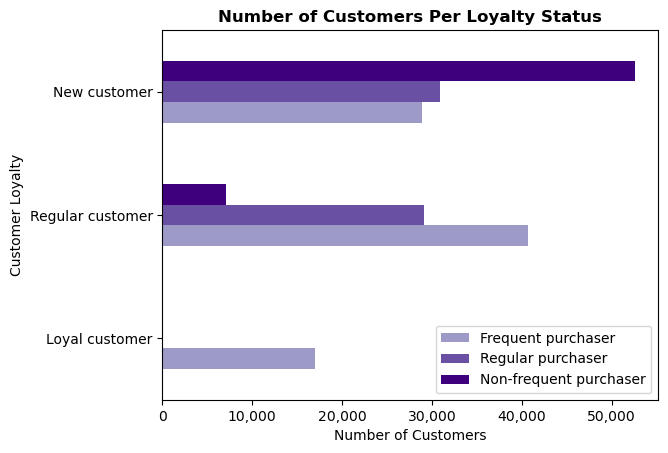

In [10]:
# plotting bar

colors = plt.get_cmap('Purples')(np.linspace(0.5, 1, 3))

loyalty_customer_bar = ax = loyalty_customer_pivot.plot(kind = 'barh', color = colors)

ax.set_title('Number of Customers Per Loyalty Status', fontweight = 'bold')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Customer Loyalty')
ax.legend(title = '')

def comma(x, pos):
    return '{:,.0f}'.format(x)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(comma))

# 2. Differences in Ordering Habits Based on Customer Region

In [11]:
# aggregating ordering habits based on region

region_ordering_habits = df.groupby('region').agg({'orders_day_of_week' : 'mean' , 'order_hour_of_day' : 'mean' , 'days_since_prior_order' : 'mean' , 'prices' : ['mean', 'sum']})

region_ordering_habits

orders_day_of_week order_hour_of_day days_since_prior_order  \
                        mean              mean                   mean   
region                                                                  
Midwest             2.738748         13.444429              11.181836   
Northeast           2.734961         13.424586              11.075769   
South               2.740662         13.416887              11.108108   
West                2.739336         13.418626              11.047196   

             prices              
               mean         sum  
region                           
Midwest    7.792584  59192977.7  
Northeast  7.782409  44530105.8  
South      7.794918  84107910.4  
West       7.790355  64595126.7

In [12]:
# rounding numbers

region_ordering_habits = region_ordering_habits.round(2)

region_ordering_habits

orders_day_of_week order_hour_of_day days_since_prior_order prices  \
                        mean              mean                   mean   mean   
region                                                                         
Midwest                 2.74             13.44                  11.18   7.79   
Northeast               2.73             13.42                  11.08   7.78   
South                   2.74             13.42                  11.11   7.79   
West                    2.74             13.42                  11.05   7.79   

                       
                  sum  
region                 
Midwest    59192977.7  
Northeast  44530105.8  
South      84107910.4  
West       64595126.7

In [13]:
# adding commas

region_ordering_habits = region_ordering_habits.applymap(lambda row: "{:,}".format(row))

region_ordering_habits

orders_day_of_week order_hour_of_day days_since_prior_order prices  \
                        mean              mean                   mean   mean   
region                                                                         
Midwest                 2.74             13.44                  11.18   7.79   
Northeast               2.73             13.42                  11.08   7.78   
South                   2.74             13.42                  11.11   7.79   
West                    2.74             13.42                  11.05   7.79   

                         
                    sum  
region                   
Midwest    59,192,977.7  
Northeast  44,530,105.8  
South      84,107,910.4  
West       64,595,126.7

In [14]:
# resetting index

region_ordering_habits = region_ordering_habits.reset_index()

In [15]:
region_ordering_habits

region orders_day_of_week order_hour_of_day days_since_prior_order  \
                           mean              mean                   mean   
0    Midwest               2.74             13.44                  11.18   
1  Northeast               2.73             13.42                  11.08   
2      South               2.74             13.42                  11.11   
3       West               2.74             13.42                  11.05   

  prices                
    mean           sum  
0   7.79  59,192,977.7  
1   7.78  44,530,105.8  
2   7.79  84,107,910.4  
3   7.79  64,595,126.7

In [16]:
# joining columns to convert to single-level index

region_ordering_habits.columns = region_ordering_habits.columns.map(''.join)

region_ordering_habits

,region,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum
0,Midwest,2.74,13.44,11.18,7.79,"59,192,977.7"
1,Northeast,2.73,13.42,11.08,7.78,"44,530,105.8"
2,South,2.74,13.42,11.11,7.79,"84,107,910.4"
3,West,2.74,13.42,11.05,7.79,"64,595,126.7"


In [17]:
# changing column names

region_ordering_habits = region_ordering_habits.rename(columns = {'orders_day_of_weekmean' : 'avg_orders_day_of_week', 'order_hour_of_daymean' : 'avg_order_hour_of_day', 'days_since_prior_ordermean' : 'avg_days_since_prior_order', 'pricesmean' : 'avg_prices', 'pricessum' : 'sum_prices'})

In [18]:
region_ordering_habits

,region,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order,avg_prices,sum_prices
0,Midwest,2.74,13.44,11.18,7.79,"59,192,977.7"
1,Northeast,2.73,13.42,11.08,7.78,"44,530,105.8"
2,South,2.74,13.42,11.11,7.79,"84,107,910.4"
3,West,2.74,13.42,11.05,7.79,"64,595,126.7"


In [19]:
# sorting by sum_prices

region_ordering_habits_sort = region_ordering_habits.sort_values(by = 'sum_prices', ascending = False)

region_ordering_habits_sort

,region,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order,avg_prices,sum_prices
2,South,2.74,13.42,11.11,7.79,"84,107,910.4"
3,West,2.74,13.42,11.05,7.79,"64,595,126.7"
0,Midwest,2.74,13.44,11.18,7.79,"59,192,977.7"
1,Northeast,2.73,13.42,11.08,7.78,"44,530,105.8"


In [20]:
# clipboarding df

region_ordering_habits_sort.to_clipboard()

# 3. Ordering Habits Based on Age and Family Status

In [21]:
# importing customer profile df

df_2 = pd.read_pickle(os.path.join(path, 'dep_cust_profile.pkl'))

df_2.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


In [22]:
# grouping age group and family status

age_fam_ordering = df_2.groupby(['age_group', 'family_group']).agg({'orders_day_of_week' : 'mean', 'order_hour_of_day' : 'mean', 'days_since_prior_order' : 'mean', 'prices' : ['mean', 'sum']}).round(2)

age_fam_ordering

orders_day_of_week order_hour_of_day  \
                                     mean              mean   
age_group family_group                                        
18-44     Family                     2.73             13.42   
          Single                     2.73             13.41   
45-64     Family                     2.75             13.43   
          Single                     2.73             13.46   
65+       Family                     2.74             13.42   
          Single                     2.75             13.44   

                       days_since_prior_order prices              
                                         mean   mean         sum  
age_group family_group                                            
18-44     Family                        11.09   7.79  80051397.4  
          Single                        11.15   7.78  26562114.2  
45-64     Family                        11.16   7.79  58997216.1  
          Single                        11.00   7.79  19969748.1  
65+       Family                        11.08   7.79  50307731.0  
          Single                        11.07   7.80  16537913.8

In [23]:
# resetting index

age_fam_ordering = age_fam_ordering.reset_index()

age_fam_ordering

age_group family_group orders_day_of_week order_hour_of_day  \
                                       mean              mean   
0     18-44       Family               2.73             13.42   
1     18-44       Single               2.73             13.41   
2     45-64       Family               2.75             13.43   
3     45-64       Single               2.73             13.46   
4       65+       Family               2.74             13.42   
5       65+       Single               2.75             13.44   

  days_since_prior_order prices              
                    mean   mean         sum  
0                  11.09   7.79  80051397.4  
1                  11.15   7.78  26562114.2  
2                  11.16   7.79  58997216.1  
3                  11.00   7.79  19969748.1  
4                  11.08   7.79  50307731.0  
5                  11.07   7.80  16537913.8

In [24]:
# concat'ing age_group and family_group

age_fam_ordering['age_fam_grouping'] = age_fam_ordering['family_group'].str.cat(age_fam_ordering['age_group'], sep = ' ')

age_fam_ordering.reset_index(drop=True)

age_fam_ordering

age_group family_group orders_day_of_week order_hour_of_day  \
                                       mean              mean   
0     18-44       Family               2.73             13.42   
1     18-44       Single               2.73             13.41   
2     45-64       Family               2.75             13.43   
3     45-64       Single               2.73             13.46   
4       65+       Family               2.74             13.42   
5       65+       Single               2.75             13.44   

  days_since_prior_order prices             age_fam_grouping  
                    mean   mean         sum                   
0                  11.09   7.79  80051397.4     Family 18-44  
1                  11.15   7.78  26562114.2     Single 18-44  
2                  11.16   7.79  58997216.1     Family 45-64  
3                  11.00   7.79  19969748.1     Single 45-64  
4                  11.08   7.79  50307731.0       Family 65+  
5                  11.07   7.80  16537913.8       Single 65+

In [25]:
# converting to single column index

age_fam_ordering.columns =  age_fam_ordering.columns.map(''.join)

age_fam_ordering

,age_group,family_group,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum,age_fam_grouping
0,18-44,Family,2.73,13.42,11.09,7.79,80051397.4,Family 18-44
1,18-44,Single,2.73,13.41,11.15,7.78,26562114.2,Single 18-44
2,45-64,Family,2.75,13.43,11.16,7.79,58997216.1,Family 45-64
3,45-64,Single,2.73,13.46,11.00,7.79,19969748.1,Single 45-64
4,65+,Family,2.74,13.42,11.08,7.79,50307731.0,Family 65+
5,65+,Single,2.75,13.44,11.07,7.80,16537913.8,Single 65+


In [26]:
# re-ordering columns

# age_fam_ordering = age_fam_ordering.reindex(columns = ['age_fam_grouping', 'avg_orders_day_of_week', 'avg_order_hour_of_day', 'avg_days_since_prior_order', 'sum_purchases'])

age_fam_isolate = age_fam_ordering.iloc[: , [7, 2, 3, 4, 5, 6]]

age_fam_isolate

,age_fam_grouping,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum
0,Family 18-44,2.73,13.42,11.09,7.79,80051397.4
1,Single 18-44,2.73,13.41,11.15,7.78,26562114.2
2,Family 45-64,2.75,13.43,11.16,7.79,58997216.1
3,Single 45-64,2.73,13.46,11.00,7.79,19969748.1
4,Family 65+,2.74,13.42,11.08,7.79,50307731.0
5,Single 65+,2.75,13.44,11.07,7.80,16537913.8


In [27]:
# sort by sum_purchases

age_fam_sort = age_fam_isolate.sort_values(by = 'pricessum', ascending = False)

age_fam_sort

,age_fam_grouping,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum
0,Family 18-44,2.73,13.42,11.09,7.79,80051397.4
2,Family 45-64,2.75,13.43,11.16,7.79,58997216.1
4,Family 65+,2.74,13.42,11.08,7.79,50307731.0
1,Single 18-44,2.73,13.41,11.15,7.78,26562114.2
3,Single 45-64,2.73,13.46,11.00,7.79,19969748.1
5,Single 65+,2.75,13.44,11.07,7.80,16537913.8


In [28]:
# indexing age_fam_grouping

age_fam_index = age_fam_sort.set_index('age_fam_grouping')

age_fam_index

,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum
age_fam_grouping,,,,,
Family 18-44,2.73,13.42,11.09,7.79,80051397.4
Family 45-64,2.75,13.43,11.16,7.79,58997216.1
Family 65+,2.74,13.42,11.08,7.79,50307731.0
Single 18-44,2.73,13.41,11.15,7.78,26562114.2
Single 45-64,2.73,13.46,11.00,7.79,19969748.1
Single 65+,2.75,13.44,11.07,7.80,16537913.8


In [29]:
# adding commas


age_fam_index['pricessum'] = age_fam_index['pricessum'].apply(lambda row : "{:,}".format(row))

age_fam_index

,orders_day_of_weekmean,order_hour_of_daymean,days_since_prior_ordermean,pricesmean,pricessum
age_fam_grouping,,,,,
Family 18-44,2.73,13.42,11.09,7.79,"80,051,397.4"
Family 45-64,2.75,13.43,11.16,7.79,"58,997,216.1"
Family 65+,2.74,13.42,11.08,7.79,"50,307,731.0"
Single 18-44,2.73,13.41,11.15,7.78,"26,562,114.2"
Single 45-64,2.73,13.46,11.00,7.79,"19,969,748.1"
Single 65+,2.75,13.44,11.07,7.80,"16,537,913.8"


In [30]:
age_fam_index.to_clipboard()

# 4. Grouping Products by Price Range

In [31]:
# crosstab of price_range frequency by department

price_range_frequency = pd.crosstab(df['department'], df['price_range'])

price_range_frequency

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,35243,118453
babies,0,125317,298485
bakery,0,287938,884490
beverages,0,852974,1835149
breakfast,0,219333,483700
bulk,0,1221,33352
canned goods,0,298683,769375
dairy eggs,5127,1431016,3962604
deli,0,313628,737621


In [32]:
# adding commas to numbers

price_range_frequency_comma = price_range_frequency.applymap(lambda x: '{:,}'.format(x))

price_range_frequency_comma

price_range,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,"35,243","118,453"
babies,0,"125,317","298,485"
bakery,0,"287,938","884,490"
beverages,0,"852,974","1,835,149"
breakfast,0,"219,333","483,700"
bulk,0,"1,221","33,352"
canned goods,0,"298,683","769,375"
dairy eggs,"5,127","1,431,016","3,962,604"
deli,0,"313,628","737,621"


In [33]:
# sorting price_range frequency

price_range_sort = price_range_frequency.sort_values(by = 'Mid-range product')

price_range_sort

price_range,High-range product,Low-range product,Mid-range product
department,,,
other,0,15972,20319
bulk,0,1221,33352
missing,0,19746,49399
pets,0,29551,68165
alcohol,0,35243,118453
international,0,76974,192279
meat seafood,412323,0,296604
babies,0,125317,298485
personal care,0,130864,316708


In [34]:
# re-ordering columns

price_range_order = price_range_sort[['High-range product', 'Mid-range product', 'Low-range product']]

price_range_order

price_range,High-range product,Mid-range product,Low-range product
department,,,
other,0,20319,15972
bulk,0,33352,1221
missing,0,49399,19746
pets,0,68165,29551
alcohol,0,118453,35243
international,0,192279,76974
meat seafood,412323,296604,0
babies,0,298485,125317
personal care,0,316708,130864


In [35]:
# applying commas to df

price_range_order_commas = price_range_order.applymap(lambda x : '{:,}'.format(x))

price_range_order_commas

price_range,High-range product,Mid-range product,Low-range product
department,,,
other,0,"20,319","15,972"
bulk,0,"33,352","1,221"
missing,0,"49,399","19,746"
pets,0,"68,165","29,551"
alcohol,0,"118,453","35,243"
international,0,"192,279","76,974"
meat seafood,"412,323","296,604",0
babies,0,"298,485","125,317"
personal care,0,"316,708","130,864"


In [36]:
price_range_order_commas.to_clipboard()

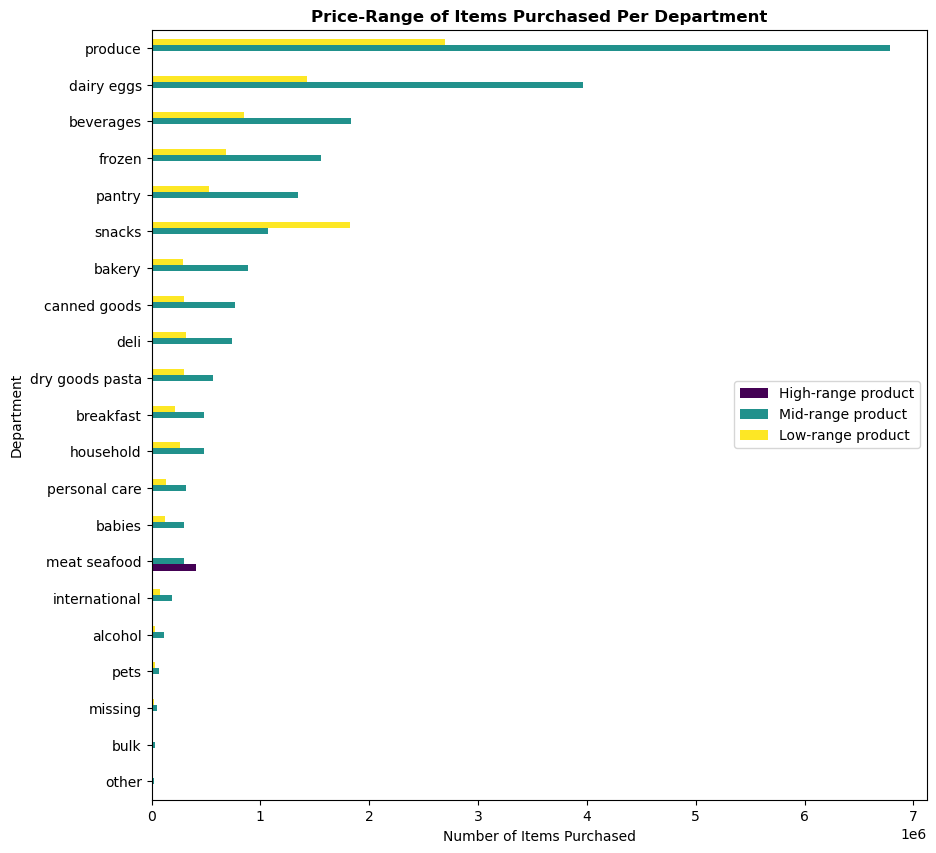

In [37]:
# bar charting

colors = plt.get_cmap('viridis', 3)

price_range_bar = ax = price_range_order.plot.barh(figsize = (10, 10), color = colors(range(3)))

ax.set_title('Price-Range of Items Purchased Per Department', fontweight = 'bold')
ax.set_xlabel('Number of Items Purchased')
ax.set_ylabel('Department')
ax.legend(title = '', loc = 'center right')

# 5. Top Demographies by Number of Orders and Revenue

In [38]:
# number of transactions per age group, income group, and family status

age_income_family_count = df_2.groupby(['age_group', 'income_group', 'family_group']).agg({'user_id' : 'count', 'prices' : 'sum'}).rename(columns={'user_id' : 'number_of_orders', 'prices' : 'sum_of_purchases'})

age_income_family_count

number_of_orders  sum_of_purchases
age_group income_group  family_group                                    
18-44     High income   Family                  374494         2965848.4
                        Single                  129930         1020663.7
          Low income    Family                 5615864        42985285.6
                        Single                 1890279        14442025.2
          Middle income Family                 4285275        34100263.4
                        Single                 1394242        11099425.3
45-64     High income   Family                 1443444        11457638.5
                        Single                  495159         3933157.8
          Low income    Family                 1204886         8289377.3
                        Single                  394303         2706329.9
          Middle income Family                 4928393        39250200.3
                        Single                 1673506        13330260.4
65+       High income   Family                 1198219         9535003.4
                        Single                  410335         3254588.7
          Low income    Family                 1015395         6994129.6
                        Single                  322039         2221940.7
          Middle income Family                 4241386        33778598.0
                        Single                 1387710        11061384.4

In [39]:
# indexing

age_income_family_index = age_income_family_count.reset_index()

age_income_family_index

,age_group,income_group,family_group,number_of_orders,sum_of_purchases
0,18-44,High income,Family,374494,2965848.4
1,18-44,High income,Single,129930,1020663.7
2,18-44,Low income,Family,5615864,42985285.6
3,18-44,Low income,Single,1890279,14442025.2
4,18-44,Middle income,Family,4285275,34100263.4
5,18-44,Middle income,Single,1394242,11099425.3
6,45-64,High income,Family,1443444,11457638.5
7,45-64,High income,Single,495159,3933157.8
8,45-64,Low income,Family,1204886,8289377.3
9,45-64,Low income,Single,394303,2706329.9


In [40]:
# sorting

age_income_family_sort = age_income_family_index.sort_values(by = 'sum_of_purchases', ascending = False)

age_income_family_sort

,age_group,income_group,family_group,number_of_orders,sum_of_purchases
2,18-44,Low income,Family,5615864,42985285.6
10,45-64,Middle income,Family,4928393,39250200.3
4,18-44,Middle income,Family,4285275,34100263.4
16,65+,Middle income,Family,4241386,33778598.0
3,18-44,Low income,Single,1890279,14442025.2
11,45-64,Middle income,Single,1673506,13330260.4
6,45-64,High income,Family,1443444,11457638.5
5,18-44,Middle income,Single,1394242,11099425.3
17,65+,Middle income,Single,1387710,11061384.4
12,65+,High income,Family,1198219,9535003.4


In [41]:
# adding commas

age_income_family_sort[['number_of_orders', 'sum_of_purchases']] = age_income_family_sort[['number_of_orders', 'sum_of_purchases']].applymap(lambda row : '{:,}'.format(row))

age_income_family_sort

,age_group,income_group,family_group,number_of_orders,sum_of_purchases
2,18-44,Low income,Family,"5,615,864","42,985,285.6"
10,45-64,Middle income,Family,"4,928,393","39,250,200.3"
4,18-44,Middle income,Family,"4,285,275","34,100,263.4"
16,65+,Middle income,Family,"4,241,386","33,778,598.0"
3,18-44,Low income,Single,"1,890,279","14,442,025.2"
11,45-64,Middle income,Single,"1,673,506","13,330,260.4"
6,45-64,High income,Family,"1,443,444","11,457,638.5"
5,18-44,Middle income,Single,"1,394,242","11,099,425.3"
17,65+,Middle income,Single,"1,387,710","11,061,384.4"
12,65+,High income,Family,"1,198,219","9,535,003.4"


In [42]:
age_income_family_sort.to_clipboard()

# 6. Revenue Fluctuations Per Hour

In [43]:
# aggregating sales by hour

rev_per_hour = df.groupby('order_hour_of_day').agg({'prices' : 'sum'})

In [44]:
rev_per_hour



,prices
order_hour_of_day,
0,1708627.1
1,902987.5
2,540953.3
3,401331.1
4,417265.0
5,688439.9
6,2270680.7
7,6967055.9
8,13383026.7


In [45]:
# indexing

rev_per_hour_index = rev_per_hour.reset_index()

rev_per_hour_index

,order_hour_of_day,prices
0,0,1708627.1
1,1,902987.5
2,2,540953.3
3,3,401331.1
4,4,417265.0
5,5,688439.9
6,6,2270680.7
7,7,6967055.9
8,8,13383026.7
9,9,19026013.7


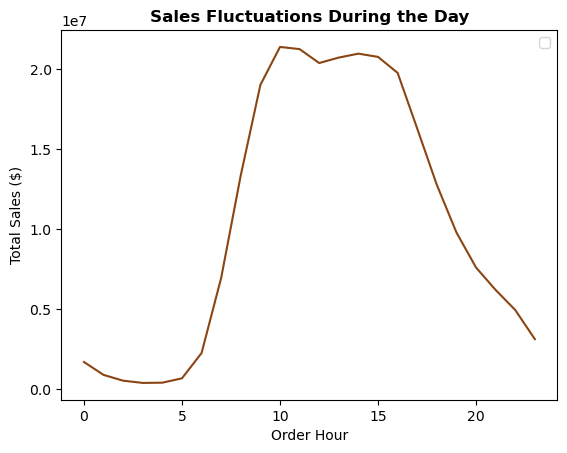

In [46]:
# importing color lib

from matplotlib.colors import ListedColormap

# plotting line chart

brown_cmap = ListedColormap(['#8B4513'])

rev_per_hour_linechart = ax = rev_per_hour_index.plot('order_hour_of_day', 'prices', color = brown_cmap(1)) 

ax.set_title('Sales Fluctuations During the Day', fontweight = 'bold')
ax.set_xlabel('Order Hour')
ax.set_ylabel('Total Sales ($)')
ax.legend('')